# Load and investigate data

Load data

In [1]:
import pandas as pd
df = pd.read_csv('spamData.csv', encoding='latin-1')

# remove unnecessary attrbutes / columns
df.drop(df.columns[4], axis=1, inplace=True)
df.drop(df.columns[3], axis=1, inplace=True)
df.drop(df.columns[2], axis=1, inplace=True)

Investigate data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   rawText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,target,rawText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As you can see we have target (or y) as spam/ham and we have rawText which contains the raw text message

In [5]:
import numpy as np

np.unique(df.target)

array(['ham', 'spam'], dtype=object)

In [6]:
y = list(df['target'])
x = list(df['rawText'])
x

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

# Prepare feature vectors from raw text

Raw text has varying size and not regular, so it is not useful as an input data for classification methods which expects feature vectors with fixed dimension and numeric values. In natural language processing (NLP) one way is to build a dictionary where all words are extracted using all the textual data. Then, for each data a feature vector will be constructed that contains frequencies of the words in the dictionary. Note that, number of words can be huge (in this dataset dictionary size is 13496). So, for spam dataset, original data contains 5572 texts then we will construct a suitable data with 5572 rows (n) and 13496 columns/attributes (p).

In [7]:
class tokenizer:
    def __init__(self, text_data):
        self.vocab = {}
        self.__get_vocab(text_data)
        
    def convert_text_dataset_to_matrix(self, X):
        vocab = self.vocab
        result = []       
        for text in tqdm(X):
            vector = self.__text_to_vector(text)
            result.append(vector)
        return result
    
    def __get_vocab(self, text_data):
        word_id = 0
        for text in text_data:
            words = text.split()
            for word in words:
                word = word.lower()
                if word not in self.vocab:
                    self.vocab[word] = word_id
                    word_id += 1
        print(f'Dictionary size : {len(self.vocab)}')
    
    def __text_to_vector(self, text):
        vocab = self.vocab
        result = list(np.zeros(len(vocab)))
        words = text.split()
        for word in words:
            word = word.lower()
            if word in vocab:
                result[vocab[word]] += 1
        return result

In [8]:
from tqdm import tqdm

tz = tokenizer(x)

Dictionary size : 13496


In [9]:
X = tz.convert_text_dataset_to_matrix(x)

100%|██████████| 5572/5572 [00:08<00:00, 652.84it/s]


In [10]:
n = len(X)
p = len(X[0])

print('Number of data in X is ', n, ' (n)')
print('Dimension of feature vector (dictionary size) is ', p, ' (p)')

Number of data in X is  5572  (n)
Dimension of feature vector (dictionary size) is  13496  (p)


# Naive Bayes classifier

**Divide your data as train and test data using train-test-split (70% train, 30% test)**

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task.Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

The procedure involves taking a dataset and dividing it into two subsets. 

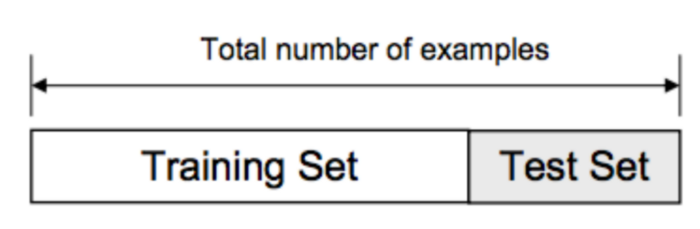

* The first subset is used to fit the model and is referred to as the training dataset.
* The second dataset is referred to as the test dataset.The test dataset is not used to train the model.

The input element of the dataset is provided to the model, then predictions are made and compared to the expected values.

We’ll split inputs and outputs.Here x's are input, y's are output.

* X_train is all independent variables to train the model.
* X_test is remaining 30% portion of the independent variables from the data which will not used in training phase and will be used to make predictions to test the accuracy of the model.
* y_train is dependent variable which need to be predicted by the model.
* y_test is used to test the accuracy betwees actual and predicted variables.

In [11]:
# student code
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

print('Training set size is',len(X_train),'rows')

print('Test set size is',len(X_test),'rows')

print('Train + test set size is',len(X_train+X_test),'rows')



Training set size is 3900 rows
Test set size is 1672 rows
Train + test set size is 5572 rows


We can use the train_test_split function in order to make the split.Here, we set the train size to 70% of the entire dataset.The train_size=0.7 inside the function indicates the percentage of the data that should be held over for training.

**Use Naive Bayes to fit on train data**

We’ll fit the model on the training data.
Training sets **X_train** and **y_train** are given to the model as inputs.

In [12]:
# student code
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)




GaussianNB()

**Do prediction on test data**

We’re fitting the model on the training data and trying to predict the test data.

In [13]:
# student code

y_pred=model.predict(X_test)





Here is a summary of what we did: 
* We’ve loaded in the data
* Split it into a training and testing sets
* Fitted a model to the training data
* Made predictions based on this data and tested the predictions on the test data.

Show classification performance

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))
print()

conf_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy:  0.9252392344497608

Confusion Matrix
[[1335   99]
 [  26  212]]

Classification Report
              precision    recall  f1-score   support

         ham       0.98      0.93      0.96      1434
        spam       0.68      0.89      0.77       238

    accuracy                           0.93      1672
   macro avg       0.83      0.91      0.86      1672
weighted avg       0.94      0.93      0.93      1672



Plot Confusion Matrix

In [15]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

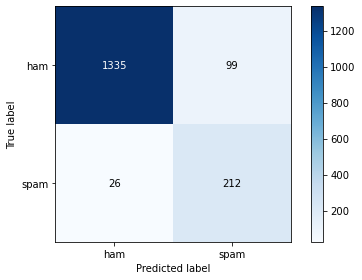

In [16]:
plot_confusion_matrix(conf_mtrx, np.unique(df.target), cmap=plt.cm.Blues)